In [2]:
import pywt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Creat a little Dataset for first test and gain time

In [3]:
df_train = pd.read_csv('./data/fashion-mnist_train.csv')
df_test = pd.read_csv('./data/fashion-mnist_test.csv')

In [4]:
label_tain = df_train['label']
data_train = df_train.drop('label', axis=1)
data_test = df_test.drop('label', axis=1)
label_test = df_test['label']

In [5]:
label_tain.shape

(60000,)

In [6]:
data_train.shape

(60000, 784)

In [7]:
label_test.shape

(10000,)

In [8]:
data_test.shape

(10000, 784)

In [9]:
def extract_wavelet_features(data):
    features = []
    for i in range(len(data)):
        # Reshape la ligne complète (784 pixels) en image 28x28
        image = data.iloc[i].values.reshape(28, 28)

        # Applique la transformation wavelet
        LL, (LH, HL, HH) = pywt.dwt2(image, 'bior1.3')

        # Concatène les coefficients en 1D
        feature = np.concatenate([LL.ravel(), LH.ravel(), HL.ravel(), HH.ravel()])
        features.append(feature)

    return np.array(features)

# Utilisation
features = extract_wavelet_features(data_train)

# Try XGBoost models with ondelette

In [11]:
model = XGBClassifier(random_state=42)
model.fit(data_train, label_tain)

,"objective objective: typing.Union[str, xgboost.sklearn._SklObjWProto, typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]], NoneType]Specify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'multi:softprob'
,"base_score base_score: typing.Union[float, typing.List[float], NoneType]The initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.Optional[typing.List[xgboost.callback.TrainingCallback]]List of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: typing.Optional[float]Subsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: typing.Optional[float]Subsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: typing.Optional[float]Subsample ratio of columns when constructing each tree.,None
,"device device: typing.Optional[str].. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: typing.Optional[int].. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: typing.Union[str, typing.List[typing.Union[str, typing.Callable]], typing.Callable, NoneType].. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes f

In [12]:
prediction = model.predict(data_test)

In [13]:
model.score(data_test, label_test)

0.9063

In [14]:
matrice = confusion_matrix(label_test, prediction)

In [15]:
print(classification_report(label_test, prediction))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85      1000
           1       0.99      0.98      0.99      1000
           2       0.85      0.83      0.84      1000
           3       0.92      0.93      0.92      1000
           4       0.85      0.88      0.87      1000
           5       0.99      0.96      0.98      1000
           6       0.75      0.71      0.73      1000
           7       0.95      0.96      0.95      1000
           8       0.97      0.98      0.98      1000
           9       0.96      0.97      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



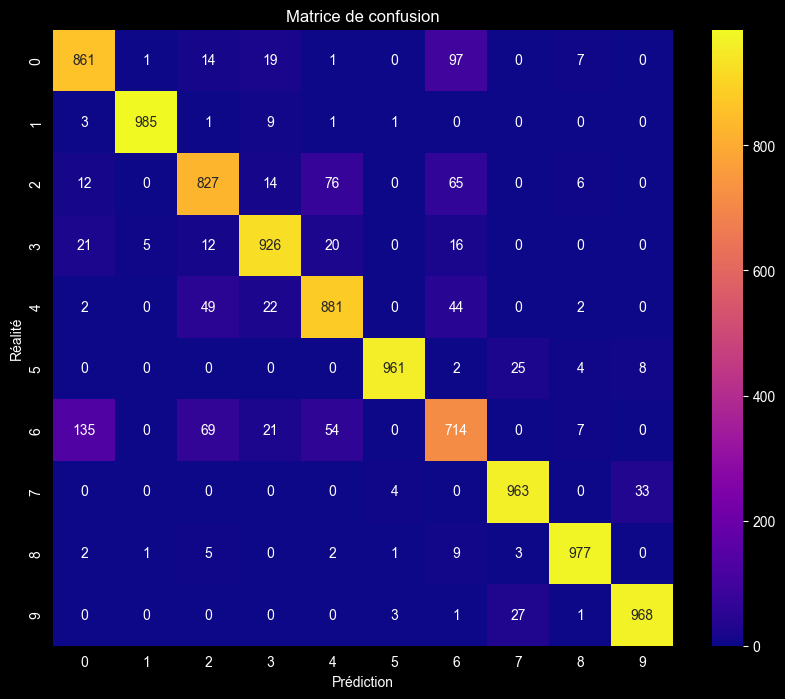

In [16]:
plt.figure(figsize=(10, 8))
sns.heatmap(matrice, annot=True, fmt='d', cmap='plasma',
            xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Prédiction')
plt.ylabel('Réalité')
plt.title('Matrice de confusion')
plt.show()